In [1]:
# importing libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import *
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# load bank marketing dataset
df = pd.read_csv('bank-additional-full.csv', sep =';')

# Exploring Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [6]:
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [7]:
print(df['job'].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [8]:
print(df['marital'].unique())

['married' 'single' 'divorced' 'unknown']


In [9]:
print(df['education'].unique())

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


<AxesSubplot:xlabel='y', ylabel='count'>

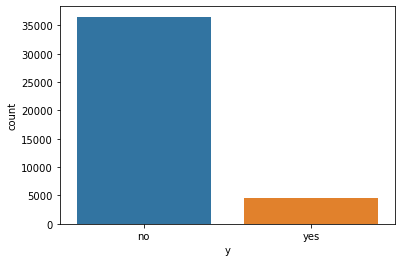

In [10]:
# plotting the target values / balanced data? No!!!
sns.countplot(data = df , x ='y')

Text(0.5, 1.0, 'Marital Situation')

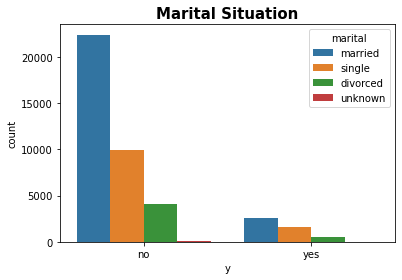

In [17]:
# grouped by marital
sns.countplot(data = df , x = 'y' , hue = 'marital')
plt.title('Marital Situation' , size = 15 , weight ='bold')

Text(0.5, 1.0, 'Education Situation')

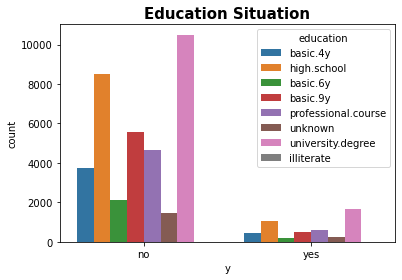

In [18]:
# grouped by education
sns.countplot(data = df , x = 'y' , hue = 'education')
plt.title('Education Situation' , size = 15 , weight ='bold')

Text(0.5, 1.0, 'Jobs Types')

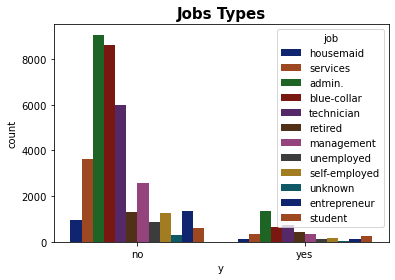

In [19]:
# grouped by job
sns.countplot(data = df , x = 'y' , hue = 'job' , palette='dark')
plt.title('Jobs Types' , size = 15 , weight ='bold')

Text(0.5, 1.0, 'Has housing loan?')

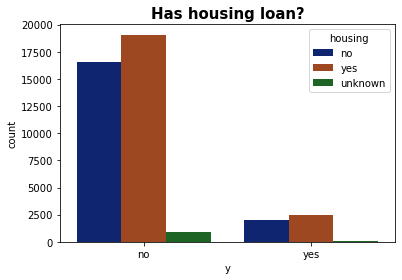

In [20]:
# has housing plot
sns.countplot(data = df , x = 'y' , hue = 'housing' , palette='dark')
plt.title('Has housing loan?' , size = 15 , weight ='bold')

Text(0.5, 1.0, 'Has credit in default?')

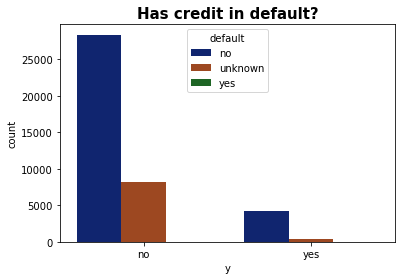

In [21]:
# has credit in default?
sns.countplot(data = df , x = 'y' , hue = 'default' , palette='dark')
plt.title('Has credit in default?' , size = 15 , weight ='bold')

# Transforming Dataset's Columns

In [22]:
# transform object values to category
df['job'] = df['job'].astype('category')
df['marital'] = df['marital'].astype('category')
df['education'] = df['education'].astype('category')
df['default'] = df['default'].astype('category')
df['housing'] = df['housing'].astype('category')
df['loan'] = df['loan'].astype('category')
df['contact'] = df['contact'].astype('category')
df['poutcome'] = df['poutcome'].astype('category')
df['day_of_week'] = df['day_of_week'].astype('category')
df['month'] = df['month'].astype('category')
df['y'] = df['y'].astype('category')

In [23]:
# transform category values to numeric
df['job'] = df['job'].cat.codes
df['marital'] = df['marital'].cat.codes
df['education'] = df['education'].cat.codes
df['default'] = df['default'].cat.codes
df['housing'] = df['housing'].cat.codes
df['loan'] = df['loan'].cat.codes
df['contact'] = df['contact'].cat.codes
df['poutcome'] = df['poutcome'].cat.codes
df['day_of_week'] = df['day_of_week'].cat.codes
df['month'] = df['month'].cat.codes
df['y'] = df['y'].cat.codes

In [24]:
print(df.dtypes)

age                 int64
job                  int8
marital              int8
education            int8
default              int8
housing              int8
loan                 int8
contact              int8
month                int8
day_of_week          int8
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome             int8
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                    int8
dtype: object


# Data Correlation

Text(0.5, 1.0, 'Data Correlation')

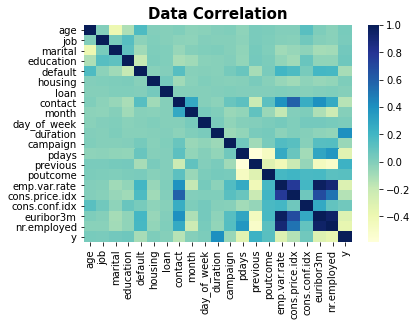

In [25]:
# heatmap data correlation of each column
matrix_corr = df.corr()
sns.heatmap(matrix_corr,
            xticklabels = matrix_corr.columns,
            yticklabels = matrix_corr.columns , cmap = 'YlGnBu' )
plt.title('Data Correlation' , size = 15 , weight = 'bold')

In [26]:
# data correlation of target (spearman method)/ showing best variables
matrix_corr = df.corr(method='spearman')
matrix_corr = matrix_corr['y'].sort_values(ascending=False)
print(matrix_corr)

y                 1.000000
duration          0.348777
previous          0.200914
poutcome          0.120787
education         0.061134
marital           0.048296
cons.conf.idx     0.041229
day_of_week       0.016118
housing           0.011574
job               0.011541
loan             -0.005074
month            -0.007281
age              -0.011861
campaign         -0.063668
default          -0.099350
cons.price.idx   -0.122187
contact          -0.144773
emp.var.rate     -0.247480
euribor3m        -0.266822
nr.employed      -0.283957
pdays            -0.324942
Name: y, dtype: float64


In [27]:
# select initial features and label
features = df[['duration','previous','pdays','nr.employed','euribor3m',
               'emp.var.rate','contact','poutcome','cons.price.idx']]
label = df['y']

# Dimension Reduction

In [29]:
# pca - dimension reduction
features = df.drop(features , axis = 1)
scaler_atr = StandardScaler()

atb = scaler_atr.fit_transform(features)
X = np.matrix(atb)
S = np.cov(np.transpose(X)) 

pca = PCA(n_components=4)

pca.fit(X)

components = np.round(pca.explained_variance_ratio_ , 2)
pca_1 = pca.transform(X)[:,0]
pca_2 = pca.transform(X)[:,1]
pca_3 = pca.transform(X)[:,2]
pca_4 = pca.transform(X)[:,3]

df['PCA1'] = pca_1
df['PCA2'] = pca_2
df['PCA3'] = pca_3
df['PCA4'] = pca_4

# Select, Normalize and Spliting Features

In [30]:
# select final features
features = df[['duration','previous','pdays','nr.employed','euribor3m',
               'emp.var.rate','contact','poutcome','cons.price.idx',
               'PCA1','PCA2','PCA3','PCA4']]

In [31]:
# normalize the features data
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [32]:
# spliting dataset in train and test
features_train, features_test, label_train, label_test = train_test_split(
    features, label, test_size=0.20, random_state=0)

# Building Keras Neural Network Dense

In [33]:
# neural networks input params
units = 100 # number of neurons in first layer
activation = 'relu' # activation function
kernel_initializer = 'random_uniform' # initialize weights
input_dim = 13 # input layer - number of features

In [34]:
# creating keras classifier neural networks Dense (Full connected)
clf = Sequential()
# input layer
clf.add(Dense(units = units, activation = activation , kernel_initializer = kernel_initializer ,
              input_dim = input_dim ))
# hidden layer 1
clf.add(Dense(units = units, activation = activation , kernel_initializer = kernel_initializer ))
# hidden layer 2
clf.add(Dense(units = units, activation = activation , kernel_initializer = kernel_initializer ))

# neural networks output params
units1 = 1 # binary output decision
activation1 = 'sigmoid' # activation function of binary classification

# output layer
clf.add(Dense(units = units1 , activation = activation1))

In [35]:
# optimizer model params 
optmizer = 'adam' # function of weights adjust
loss = 'binary_crossentropy' # loss function, error evaluate
metrics = 'binary_accuracy' # evaluate metric
clf.compile(optimizer = optmizer , loss = loss , metrics = [metrics])

# Training Dataset

In [36]:
# training model
clf.fit(features_train , label_train , batch_size = 5 , epochs = 100 )

Epoch 1/100
6590/6590 [==============================] - 5s 714us/step - loss: 0.1330 - binary_accuracy: 0.9499
Epoch 2/100
6590/6590 [==============================] - 5s 715us/step - loss: 0.0812 - binary_accuracy: 0.9675
Epoch 3/100
6590/6590 [==============================] - 5s 708us/step - loss: 0.0750 - binary_accuracy: 0.9730
Epoch 4/100
6590/6590 [==============================] - 5s 709us/step - loss: 0.0697 - binary_accuracy: 0.9741
Epoch 5/100
6590/6590 [==============================] - 5s 753us/step - loss: 0.0721 - binary_accuracy: 0.9732
Epoch 6/100
6590/6590 [==============================] - 5s 698us/step - loss: 0.0683 - binary_accuracy: 0.9753
Epoch 7/100
6590/6590 [==============================] - 5s 715us/step - loss: 0.0672 - binary_accuracy: 0.9741
Epoch 8/100
6590/6590 [==============================] - 5s 751us/step - loss: 0.0628 - binary_accuracy: 0.9741
Epoch 9/100
6590/6590 [==============================] - 5s 777us/step - loss: 0.0606 - binary_accuracy:

In [37]:
# making predictions
predictions = clf.predict(features_test)
predictions = (predictions > 0.5)

In [38]:
# evaluating accuracy with test dataset
acc = accuracy_score(label_test , predictions)
print('Neural Network Accuracy: ',round(acc , 3)*100,'%')

Neural Network Accuracy:  98.3 %


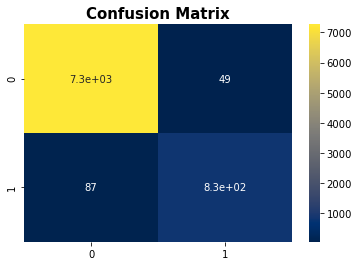

In [39]:
# confusion matrix
cm = confusion_matrix(label_test , predictions)
sns.heatmap(cm, annot=True , cmap ='cividis')
plt.title('Confusion Matrix' , size = 15 , weight = 'bold')
plt.show()

In [40]:
# overview of neural network architecture
print(clf.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 21,701
Trainable params: 21,701
Non-trainable params: 0
_________________________________________________________________
None
